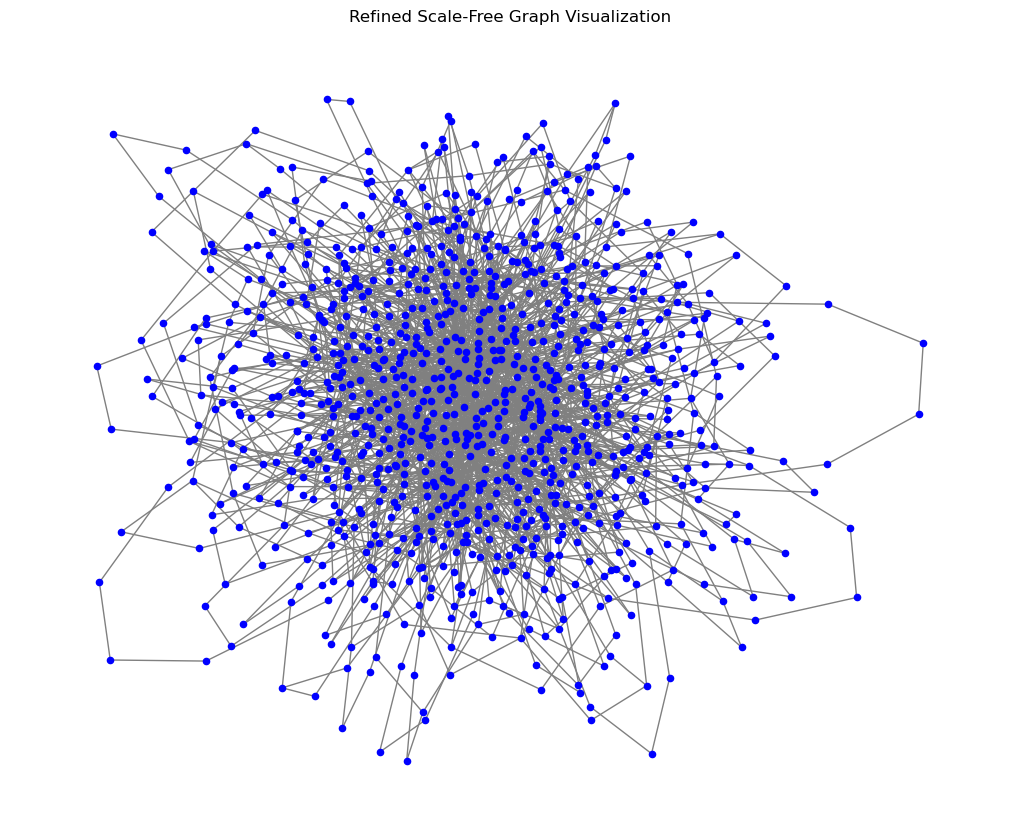

Is the graph connected? Yes
Gini Index of the graph: 0.3821


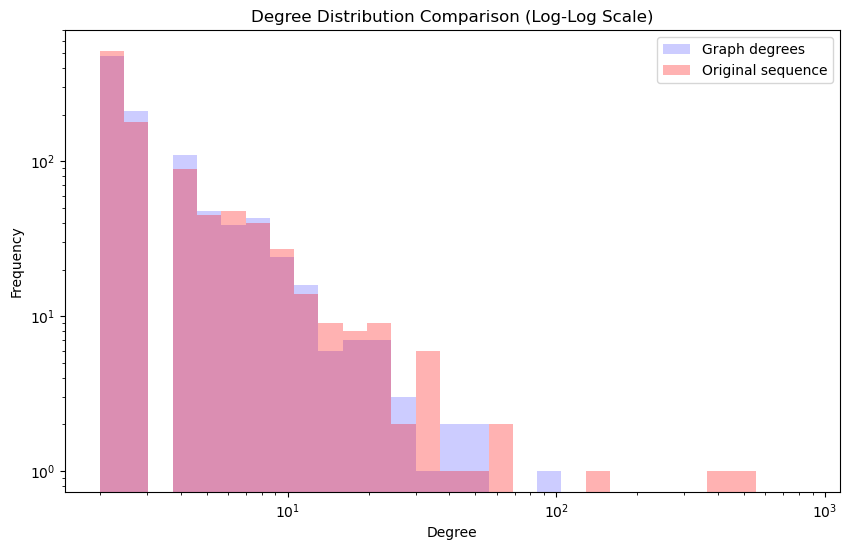

Kolmogorov-Smirnov Statistic: 0.0360, P-value: 0.5363


In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def calculate_gini_index(values):
    sorted_values = np.sort(values)
    n = len(values)
    cumulative_sum = np.cumsum(sorted_values, dtype=float)
    relative_cumulative_sum = cumulative_sum / cumulative_sum[-1]
    lorenz_curve = np.concatenate([[0], relative_cumulative_sum])
    lorenz_area = np.trapz(lorenz_curve, dx=1/n)
    gini = 1 - 2 * lorenz_area
    return gini

def generate_barabasi_albert_graph(num_nodes, initial_links):
    G = nx.barabasi_albert_graph(num_nodes, initial_links)
    degrees = [d for _, d in G.degree()]
    return G, degrees

def refine_graph_degree_distribution(G, target_degrees, max_tries=100):
    for _ in range(max_tries):
        nx.double_edge_swap(G, nswap=10 * len(G.edges()), max_tries=100 * len(G.edges()))
        graph_degrees = [d for _, d in G.degree()]
        if ks_2samp(graph_degrees, target_degrees).statistic < 0.1:
            break
    return G

num_nodes = 1000
gamma = 2.5
min_degree = 2
initial_links = max(1, min_degree)

seq = []
while len(seq) < num_nodes:
    degree = np.random.zipf(gamma)
    if degree >= min_degree:
        seq.append(degree)

if sum(seq) % 2 != 0:
    seq[-1] += 1

G, graph_degrees = generate_barabasi_albert_graph(num_nodes, initial_links)

G = refine_graph_degree_distribution(G, seq)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=20, node_color='blue', edge_color='gray')
plt.title("Refined Scale-Free Graph Visualization")
plt.show()

is_connected = nx.is_connected(G)
print(f"Is the graph connected? {'Yes' if is_connected else 'No'}")

gini_index = calculate_gini_index(graph_degrees)
print(f"Gini Index of the graph: {gini_index:.4f}")

bins = np.logspace(np.log10(min(seq)), np.log10(max(seq)), 30)

plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.xscale('log')

plt.hist(graph_degrees, bins=bins, color='blue', alpha=0.2, label='Graph degrees')
plt.hist(seq, bins=bins, color='red', alpha=0.3, label='Original sequence')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution Comparison (Log-Log Scale)')
plt.legend()
plt.show()

ks_stat, p_value = ks_2samp(graph_degrees, seq)
print(f"Kolmogorov-Smirnov Statistic: {ks_stat:.4f}, P-value: {p_value:.4f}")
